In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read a image using cv as gary level

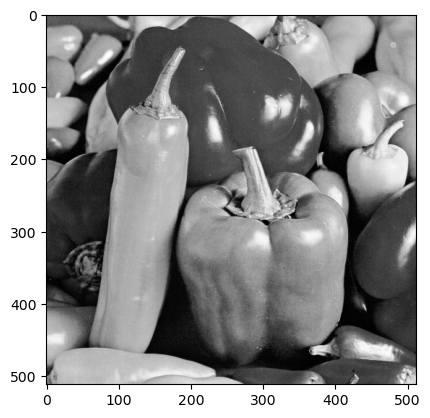

<class 'numpy.uint8'>


In [4]:
lena_image = cv.imread("peppers2.tif", 0)
plt.imshow(lena_image, cmap='gray')

plt.show()
print(type(lena_image[0,0]))

## thansfer the image into frequency domain

In [5]:
frequncy_domain_image = np.fft.fft2(lena_image)


### show the frequecny domain image

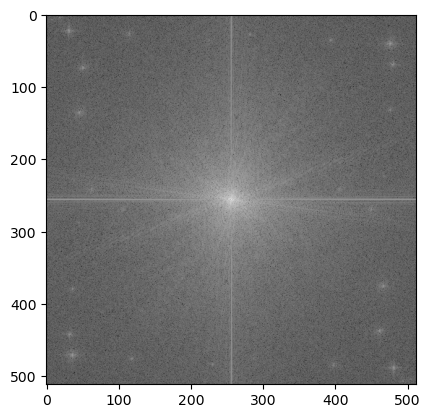

In [6]:
frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
plt.axis()
plt.show()

In [7]:
def batterworth_low_pass_filter(image, order, cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    n = order
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i , j] = 1/(1+(d/d0)**(2*n))
    
    plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
    plt.title("image in frequecny domain")
    plt.show()
    plt.imshow(np.abs(np.log1p(my_filter)), cmap='gray')
    plt.title("batterwotht filter")
    plt.show()

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.show()
    plt.imshow(filtered_image, cmap='gray')
    plt.title('batterworth filted image')
    plt.show()
    return filtered_image


In [8]:
def gaussian_low_pass_filter(image , cutt_off_frequecny):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cutt_off_frequecny


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = np.exp(-d**2/(2*d0**2))
    
    plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
    plt.title("image in frequecny domain")
    plt.show()
    plt.imshow(np.abs(np.log1p(my_filter)), cmap='gray')
    plt.title("gaussing filter")
    plt.show()

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.show()
    plt.imshow(filtered_image, cmap='gray')
    plt.title('gaussing filted image')
    plt.show()
    return filtered_image


In [9]:
def ideal_low_pass_filter(image , cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = d <= d0
    
    plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
    plt.title("image in frequecny domain")
    plt.show()
    plt.imshow(np.abs(np.log1p(my_filter)), cmap='gray')
    plt.title("ideal low pass filter")
    plt.show()

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.show()
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Ideal low Pass filted image')
    plt.show()
    return filtered_image


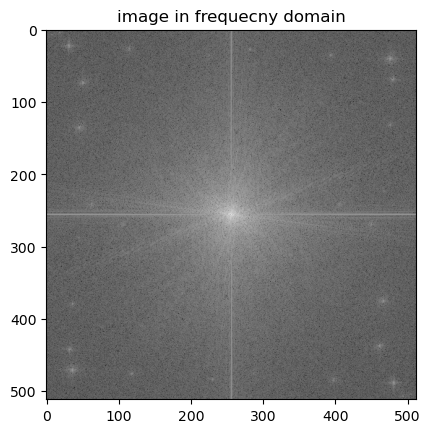

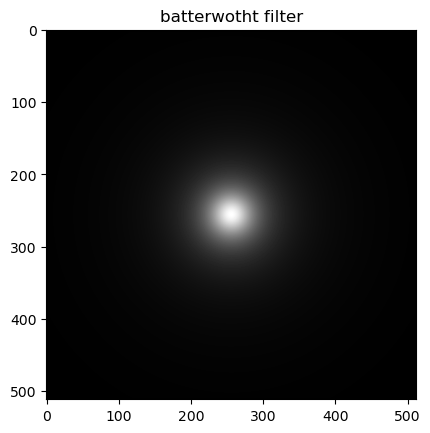

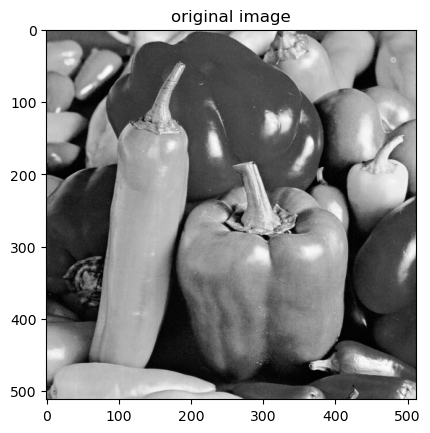

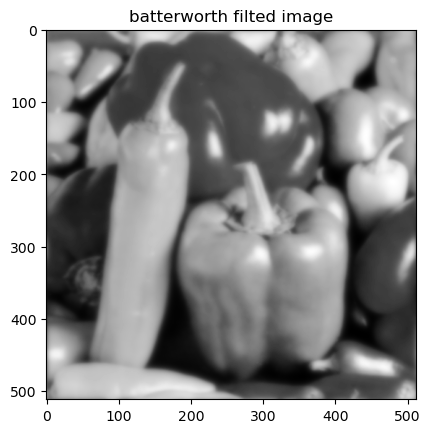

In [10]:
filtered_image = batterworth_low_pass_filter(lena_image, 1, 25)

In [11]:
# now we want to create a function to add gausina noise to a perticular image
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + noise
    min_val = np.min(noisy_image)
    max_val = np.max(noisy_image)
    difference = max_val - min_val
    noisy_image = (noisy_image - min_val) / difference * 255
    # print(np.min(noisy_image))
    # print(np.max(noisy_image))
    return noisy_image.astype(np.uint8)

In [12]:
def histogram(image):
    hist = np.zeros(256, dtype=np.int32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i, j]] += 1
    return range(256), hist

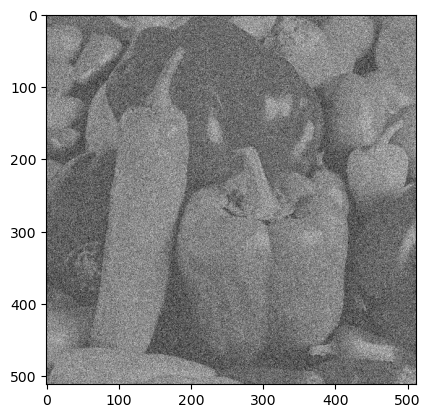

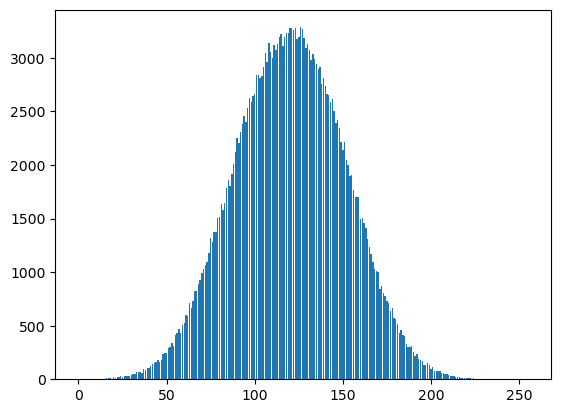

In [13]:
noisy_image = add_gaussian_noise(lena_image, 0, 70)
plt.imshow(noisy_image, cmap='gray')
plt.show()
x, y = histogram(noisy_image)
plt.bar(x, y)
plt.show()

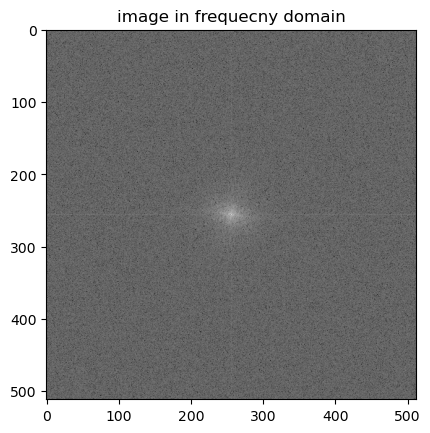

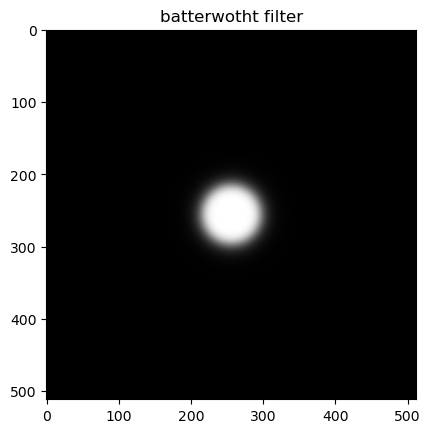

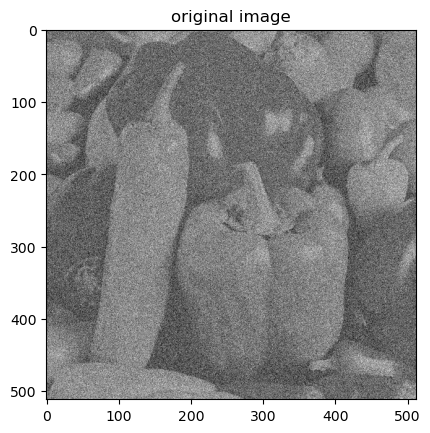

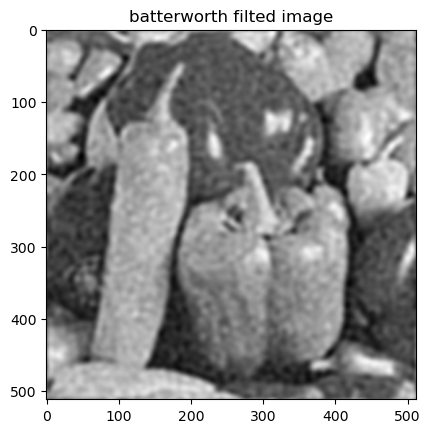

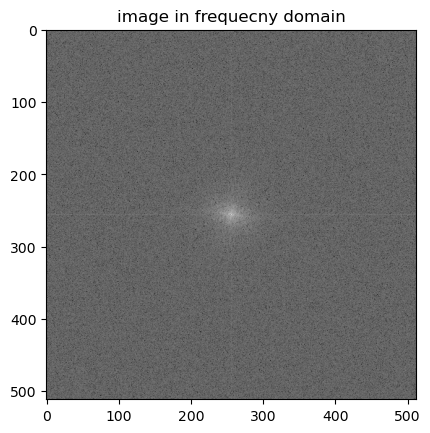

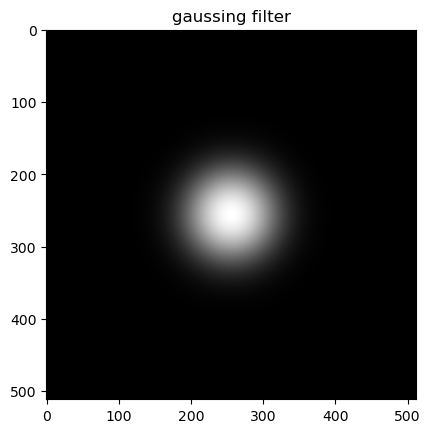

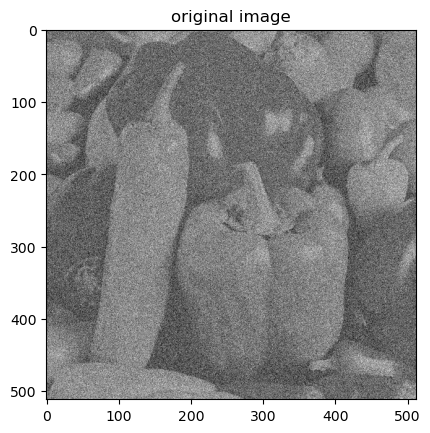

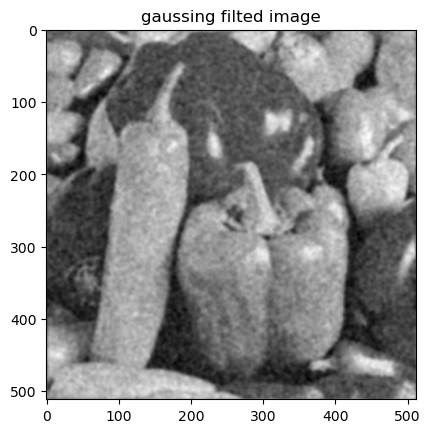

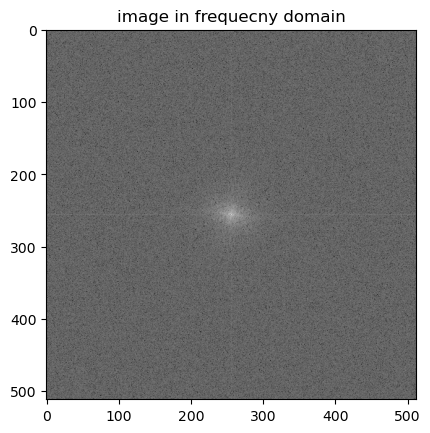

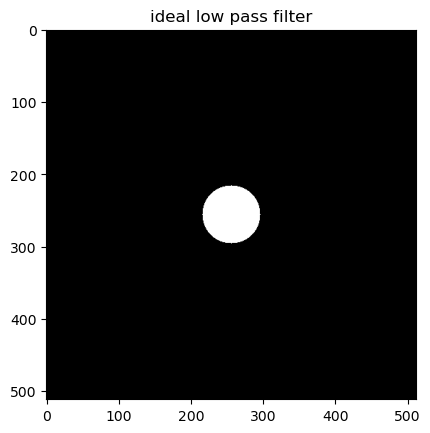

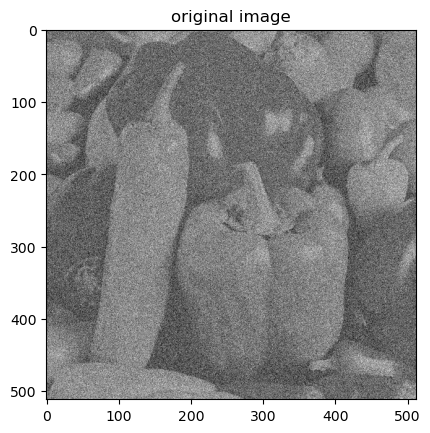

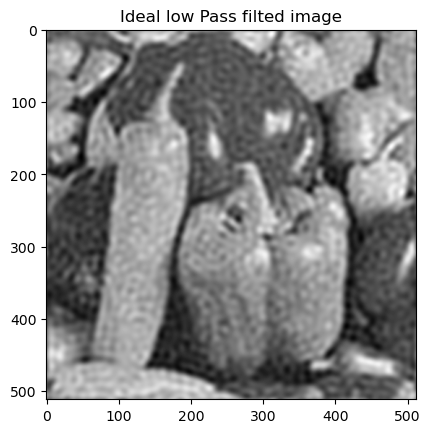

In [14]:
batter = batterworth_low_pass_filter(noisy_image, 4, 40)
gauss = gaussian_low_pass_filter(noisy_image, 40)
lowpass = ideal_low_pass_filter(noisy_image, 40)


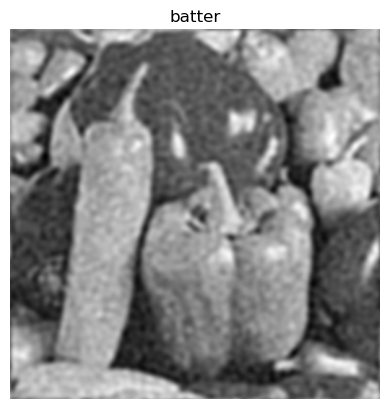

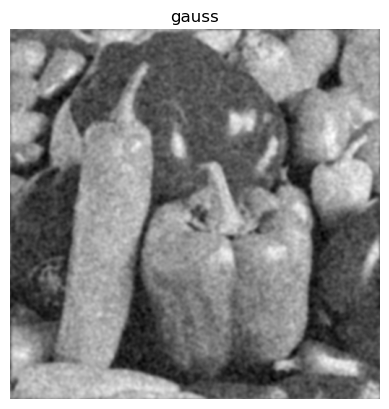

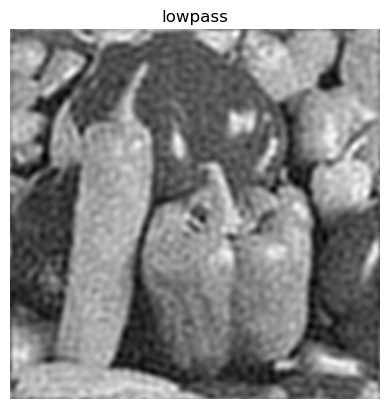

In [15]:
plt.imshow(batter, cmap='gray')
plt.title('batter')
plt.axis('off')
plt.show()
plt.imshow(gauss, cmap='gray')
plt.title('gauss')
plt.axis('off')
plt.show()
plt.imshow(lowpass, cmap='gray')
plt.title('lowpass')
plt.axis('off')
plt.show()

In [16]:
def gaussian_edge(image , cutt_off_frequecny):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cutt_off_frequecny


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = 1 - np.exp(-d**2/(2*d0**2))
    
    plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
    plt.title("image in frequecny domain")
    plt.show()
    plt.imshow(np.abs(np.log1p(my_filter)), cmap='gray')
    plt.title("gaussing edge filter")
    plt.show()

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.show()
    plt.imshow(filtered_image, cmap='gray')
    plt.title('gaussing edge filted image')
    plt.show()
    return filtered_image


In [17]:
def ideal_high_pass(image , cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = d >= d0
    
    plt.imshow(np.log1p(np.abs(frequncy_domain_image)), cmap='gray')
    plt.title("image in frequecny domain")
    plt.show()
    plt.imshow(np.abs(np.log1p(my_filter)), cmap='gray')
    plt.title("ideal huigh pass filter")
    plt.show()

    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    plt.imshow(image, cmap='gray')
    plt.title('original image')
    plt.show()
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Ideal high Pass filted image')
    plt.show()
    return filtered_image


In [20]:
moon = cv.imread("peppers2.tif", 0)

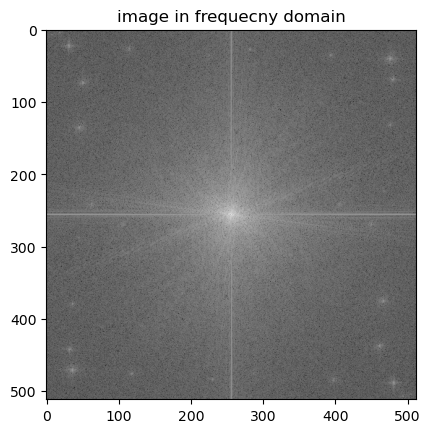

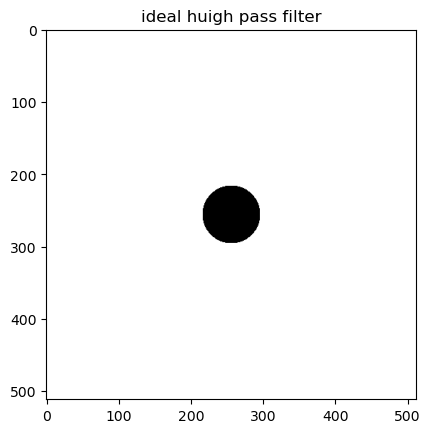

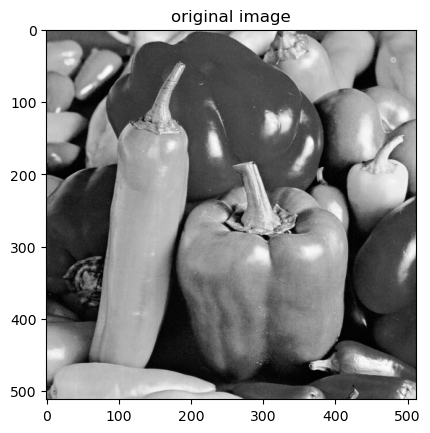

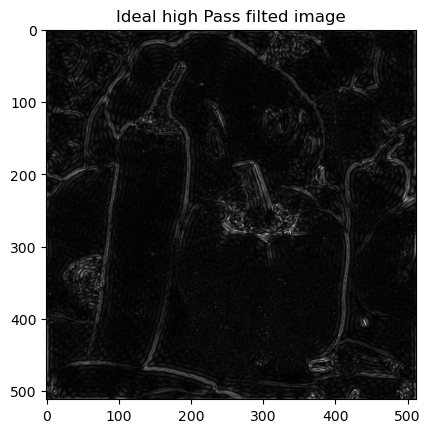

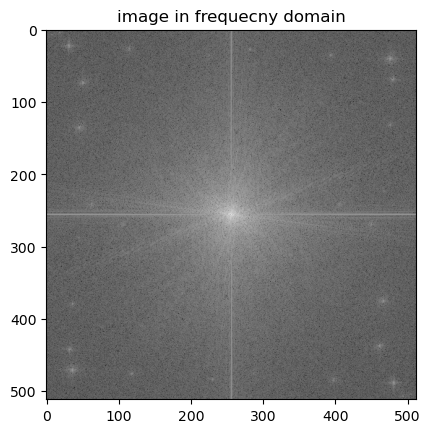

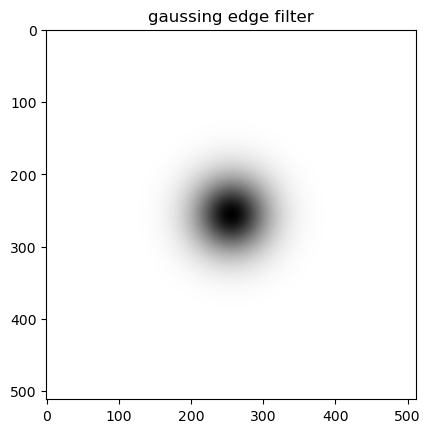

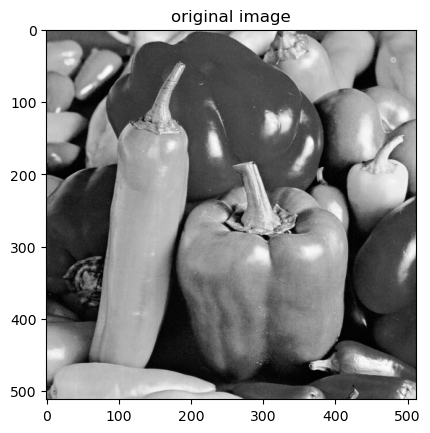

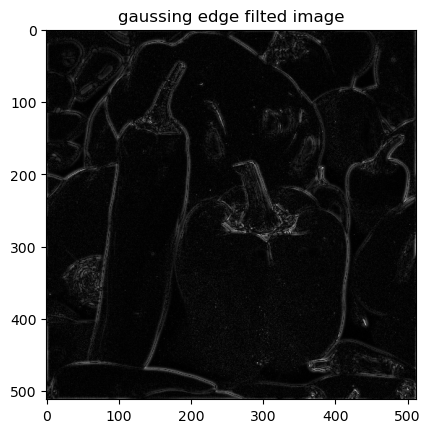

In [21]:
edge = ideal_high_pass(moon, 40)
gauss_edge = gaussian_edge(moon, 40)